# Model comparison in practice

[Data set download](https://s3.amazonaws.com/bebi103.caltech.edu/data/singer_transcript_counts.csv)

<hr>

In [1]:
# Colab setup ------------------
import os, sys, subprocess
if "google.colab" in sys.modules:
    cmd = "pip install --upgrade colorcet bebi103 arviz cmdstanpy watermark"
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    import cmdstanpy; cmdstanpy.install_cmdstan()
    data_path = "https://s3.amazonaws.com/bebi103.caltech.edu/data/"
else:
    data_path = "../data/"
# ------------------------------

/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])
/Users/bois/opt/anaconda3/lib/python3.9/site-packages/colorcet/__init__.py:74: UserWarning: Trying to register the cmap 'cet_gray_r' which already exists.
  register_cmap("cet_"+name, cmap=cm[name])


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
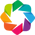

Loading BokehJS ...

In [2]:
import numpy as np
import pandas as pd

import cmdstanpy
import arviz as az

import bebi103

import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

When comparing models, posterior predictive checks are a must. As discussed in the previous lesson, we can use **information criteria** to assess relative predictive effectiveness of models. In order to understand this lesson, you will need have carefully read and understand the previous lesson on the theory behind model comparison.

The key quantity we compute for more comparison is the **expected log pointwise predictive density**, or elpd. There were a few key ideas and assumptions in using elpd.

1. The elpd is an approximation of the difference in the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback–Leibler_divergence) between the posterior predictive distribution and the true generative distribution.
2. For our set of measurements $y = (y_1, y_2, \ldots y_N)$, where each $y_i$ may be multidimensional (as you would have, for example, of beak length/beak depth measurements for a single finch), we assume that $y_i$'s are independently distributed, both in the model and in the true generative distribution.

With these assumptions, we can approximately compute the elpd using the Watanabe-Akaike information criterion (WAIC) or leave-one-out cross validation (LOO). See [this paper by Vehtari, Gelman, and Gabry](https://doi.org/10.1007/s11222-016-9696-4) ([arXiv version](https://arxiv.org/abs/1507.04544)) for more details about the implementation. As described in that paper, LOO, when computed using Pareto-smoothed importance sampling, is the preferred method for computing an approximate elpd.

Importantly, the (approximate) elpd by itself is not terribly useful in assessing a model. The elpd of one prospective model needs to be compared to another. For this comparison, we can compute Akaike weights. This is the most straightforward calculation of relative weights of respective models, and perhaps easiest to understand. However, it may not be the best way to assess the *predictive* capabilities of a model, especially in situations where the true generative model is not known (which is often the case for us as scientists). As we think about generative models, and we are not sure which model best generates observed data, it is useful to think about **model averaging** if our aim is to be predictive. The idea here is that we do not know which model generates data. Instead, we try to find a combination of models that spans all of the models we are considering, that best describe the data. The respective weights of the models give their contributions to this combination of models. As a scientist, I tend to shy away from model averaging; I am rather seeking to understand how nature generates the observations I see, and nature is not trying to predict, nor average models. However, taking a model averaging approach with an eye for optimizing predictive performance leads to more robust estimates of model weights, as outlined in [this paper by Yao and coworkers](https://doi.org/10.1214/17-BA1091), which describes a technique known as **stacking**. 

In this tutorial, we will demonstrate how to calculate model weights both by using Akaike weights (and variants thereof), and stacking. Conveniently, this may be done approximately directly from samples out of the posterior distributions. The [ArviZ package](https://arviz-devs.github.io/arviz/) provides much of the functionality we need.

## An example model comparison

To show how we can do an model comparison, we will again consider the data set from [Singer and coworkers](../09/parameter_estimation_with_mcmc.ipynb), where they performed RNA FISH to determine the copy numbers of RNA transcripts of specific genes in individual cells in their samples. The data set can be downloaded [here](https://s3.amazonaws.com/bebi103.caltech.edu/data/singer_transcript_counts.csv).

We will work with the Rex1 gene. In previous lessons, we considered two models. First, a model in which transcript counts are generated from a single Negative Binomial distribution. Second, a mixture model in which the transcript counts are generated from two Negative Binomial distributions. Note that this is a purely academic exercise, since the first model will fail posterior predictive checks quite spectacularly. We would never really come to this point where we needed to do a model comparison, but we proceed to demonstrate how it is done in practice.

### Computing the pointwise log likelihood

Recalling from lecture, the elpd is the the logarithm of the **posterior predictive distribution**, $f(\tilde{y}_i\mid y)$, averaged over the true generative distribution $f_t(\tilde{y}_i)$.

\begin{align}
\text{elpd} = \sum_{i=1}^N\int\mathrm{d}\tilde{y}_i\,\,f_t(\tilde{y}_i)\,\ln f(\tilde{y}_i\mid y).
\end{align}

When generating our samples, we therefore also need to compute samples of the value of the log likelihood. To do this, for each set of parameters $\theta$ that we sample out of the posterior, we compute the *pointwise* log likelihood of the data set, using the parameters $\theta$. The Stan code below includes these log likelihood samples as well as posterior predictive checks for the single Negative Binomial model. Read the code carefully.

```stan
data {
  int<lower=0> N;
  int<lower=0> n[N];
}


parameters {
  real log10_alpha;
  real log10_b;
}


transformed parameters {
  real alpha = 10^log10_alpha;
  real b = 10^log10_b;
  real beta_ = 1.0 / b;
}


model {
  // Priors
  log10_alpha ~ normal(0, 1);
  log10_b ~ normal(2, 1);

  // Likelihood
  n ~ neg_binomial(alpha, beta_);
}


generated quantities {
  int n_ppc[N];
  real log_lik[N];

  // Draw posterior predictive data set
  for (i in 1:N) {
    n_ppc[i] = neg_binomial_rng(alpha, beta_);
  }
  
  // Compute pointwise log likelihood
  for (i in 1:N) {
    log_lik[i] = neg_binomial_lpmf(n[i] | alpha, beta_);
  }
}
```

In the array `log_lik`, I store the pointwise log likelihood. That is, for each measurement (in this case for each $n_i$), I compute the log likelihood for that data point using the parameters (in this case `alpha` and `beta_`) that I sampled out of the posterior. Conveniently, Stan's distributions all have a function that ends in `_lpdf` that compute the log probability density function for the distribution (with `_lpmf` for discrete distributions that computes the log probability mass function for the distribution). 

Let's sample out of this generative model, keeping samples of posterior predictive data sets and pointwise log likelihoods.

In [3]:
# Load data and make data dictionary
df = pd.read_csv(os.path.join(data_path, "singer_transcript_counts.csv"), comment="#")
data = {"N": len(df), "n": df["Rex1"].values.astype(int)}

# Compile the model
sm = cmdstanpy.CmdStanModel(stan_file="neg_binom.stan")

# Perform sampling
samples = sm.sample(data=data)

INFO:cmdstanpy:compiling stan file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom.stan to exe file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom
INFO:cmdstanpy:compiled model executable: /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


When we convert the samples to an ArviZ object, we need to specify the posterior predictive *and* log likelihood.

In [4]:
# Convert to ArviZ object
samples = az.from_cmdstanpy(
    posterior=samples, posterior_predictive="n_ppc", log_likelihood="log_lik"
)

Now, we will check the diagnostics (as we always should) and make a corner plot.

In [5]:
# Check diagnostics
bebi103.stan.check_all_diagnostics(samples)

# Make a corner plot
bokeh.io.show(bebi103.viz.corner(samples, parameters=['alpha', 'b']))

Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

0 of 4000 (0.0%) iterations ended with a divergence.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 10.

E-BFMI indicated no pathological behavior.


Everything looks good. Actually, it doesn't. The *sampling* looks good, but we should do posterior predictive checks.

In [6]:
n_ppc = samples.posterior_predictive.n_ppc.stack(
    {"sample": ("chain", "draw")}
).transpose("sample", "n_ppc_dim_0")

bokeh.io.show(
    bebi103.viz.predictive_ecdf(
        n_ppc,
        name="n_ppc",
        data=df["Rex1"].values,
        x_axis_label="mRNA copy number",
    )
)

We have clearly failed the posterior predictive checks. We can stop here, but we will continue to compute the WAIC and LOO for illustrative purposes. As we do that, let's take a quick look at the output so we can see how the log likelihood samples are organized. The log likelihood is stored in ArviZ `InferenceData` objects in the `log_likelihood` attribute.

In [7]:
samples.log_likelihood

<xarray.Dataset>
Dimensions:        (chain: 4, draw: 1000, log_lik_dim_0: 279)
Coordinates:
  * chain          (chain) int64 0 1 2 3
  * draw           (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * log_lik_dim_0  (log_lik_dim_0) int64 0 1 2 3 4 5 ... 273 274 275 276 277 278
Data variables:
    log_lik        (chain, draw, log_lik_dim_0) float64 -5.798 -5.903 ... -6.826
Attributes:
    created_at:                 2022-02-07T02:25:56.689063
    arviz_version:              0.11.4
    inference_library:          cmdstanpy
    inference_library_version:  1.0.0

The log likelihood is three dimensional, one dimension each for chain and draw, and then the final dimension is for the pointwise log-likelihood estimates.

Given that the log likelihood is stored in the ArviZ object, we can directly use the samples to compute the WAIC and LOO.

### Computing the WAIC and LOO

We will start with the WAIC. We use the `scale="deviance"` kwarg to get the WAIC. By default, `az.waic()` will return the estimate for the elpd and not the traditionally used $-2\mathrm{elpd}_\mathrm{WAIC}$.

In [8]:
az.waic(samples, scale="deviance")

Computed from 4000 by 279 log-likelihood matrix

              Estimate       SE
deviance_waic  3281.53    17.28
p_waic            2.08        -

The output gives an estimate for the WAIC, and also the contribution of $p_\mathrm{waic}$. It also give an estimate of the standard error in the WAIC.

Let's now compute the LOO.

In [9]:
single_loo = az.loo(samples, scale="deviance")

single_loo

Computed from 4000 by 279 log-likelihood matrix

             Estimate       SE
deviance_loo  3281.53    17.28
p_loo            2.08        -

We see that the LOO and WAIC give almost identical results (as they should). Remember, though, that LOO has better performance across a wider variety of models.

### Calculations with the mixture model

Now, let's do the same calculation for the mixture model. In this case, we do not have a built-in distribution to use a `_logpmf` function. Fortunately, the `log_mix()` function in Stan accomplishes exactly what we need, as it did when we added it to `target` in the model specification.

```stan
data {
  int<lower=0> N;
  int<lower=0> n[N];
}


parameters {
  vector<lower=0>[2] alpha;
  vector<lower=0>[2] b;
  real<lower=0, upper=1> w;
}


transformed parameters {
  vector[2] beta_ = 1.0 ./ b;
}


model {
  // Priors
  alpha ~ lognormal(0.0, 2.3);
  b ~ lognormal(4.6, 2.3);
  w ~ beta(1.0, 1.0);

  // Likelihood
  for (n_val in n) {
    target += log_mix(
      w,
      neg_binomial_lpmf(n_val | alpha[1], beta_[1]),
      neg_binomial_lpmf(n_val | alpha[2], beta_[2])
    );
  }
}


generated quantities {
  int n_ppc[N];
  real log_lik[N];
  
  // Posterior predictive checks
  for (i in 1:N) {
    if (uniform_rng(0.0, 1.0) < w) {
      n_ppc[i] = neg_binomial_rng(alpha[1], beta_[1]);
    }
    else {
      n_ppc[i] = neg_binomial_rng(alpha[2], beta_[2]);
    }
  }
  
  // Pointwise log likelihood
  for (i in 1:N) {
    log_lik[i] = log_mix(
      w,
      neg_binomial_lpmf(n[i] | alpha[1], beta_[1]),
      neg_binomial_lpmf(n[i] | alpha[2], beta_[2]));
  }
}
```

Let's compile the model and get some samples.

In [10]:
sm_mix = cmdstanpy.CmdStanModel(stan_file="neg_binom_mix.stan")

samples_mix = sm_mix.sample(data=data, seed=3252)
samples_mix = az.from_cmdstanpy(
    posterior=samples_mix, posterior_predictive="n_ppc", log_likelihood="log_lik"
)

INFO:cmdstanpy:compiling stan file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom_mix.stan to exe file /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom_mix
INFO:cmdstanpy:compiled model executable: /Users/bois/Dropbox/git/bebi103_course/2022/b/content/lessons/19/neg_binom_mix
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


We'll do our usual diagnostic checks and make a corner plot.

In [11]:
# Check diagnostics
bebi103.stan.check_all_diagnostics(samples_mix)

# Make corner plot
bokeh.io.show(
    bebi103.viz.corner(
        samples_mix,
        parameters=["alpha[0]", "alpha[1]", "b[0]", "b[1]", "w"],
        xtick_label_orientation=np.pi / 4,
    )
)

ESS for parameter alpha[0] is 12.081509991988455.
tail-ESS for parameter alpha[0] is 30.395170672786044.
ESS for parameter alpha[1] is 14.943372303617434.
ESS for parameter b[0] is 7.270256023975883.
tail-ESS for parameter b[0] is 32.267721243491906.
ESS for parameter b[1] is 7.518121516470861.
tail-ESS for parameter b[1] is 36.077000481315864.
ESS for parameter w is 7.220659688817705.
tail-ESS for parameter w is 36.14894669637608.
ESS for parameter beta_[0] is 7.270250511164963.
tail-ESS for parameter beta_[0] is 32.26772124349153.
ESS for parameter beta_[1] is 7.518120558107662.
tail-ESS for parameter beta_[1] is 36.07700048131666.
  ESS or tail-ESS below 100 per chain indicates that expectation values
  computed from samples are unlikely to be good approximations of the
  true expectation values.

Rhat for parameter alpha[0] is 1.2541870866317788.
Rhat for parameter alpha[1] is 1.1993667810059625.
Rhat for parameter b[0] is 1.5270103033435662.
Rhat for parameter b[1] is 1.5016500571

Oof! We failed the ESS and Rhat diagnostics. Recall that sampling is [tricky because of label switching](../10/mixture_model_stan.ipynb). To protect against label switching, we will initialize the walker near where chain 1 sampled.

In [12]:
# Compute mean of parameters for chain 1
inits = {
    "alpha": [
        float(samples_mix.posterior.sel(chain=1, alpha_dim_0=0).alpha.mean()),
        float(samples_mix.posterior.sel(chain=1, alpha_dim_0=1).alpha.mean()),
    ],
    "b": [
        float(samples_mix.posterior.sel(chain=1, b_dim_0=0).b.mean()),
        float(samples_mix.posterior.sel(chain=1, b_dim_0=0).b.mean()),
    ],
    "w": float(samples_mix.posterior.sel(chain=1).w.mean()),
}

# Take a look
inits

{'alpha': [3.2310881, 5.2606952],
 'b': [6.249493922, 6.249493922],
 'w': 0.1705901743}

Now we'll use this as our initial walker positions.

In [13]:
# Sample
samples_mix = sm_mix.sample(data, inits=inits)

# Convert to ArviZ
samples_mix = az.from_cmdstanpy(
    posterior=samples_mix, posterior_predictive="n_ppc", log_likelihood="log_lik"
)

# Check diagnostics
bebi103.stan.check_all_diagnostics(samples_mix)

# Make corner plot
bokeh.io.show(
    bebi103.viz.corner(
        samples_mix,
        parameters=["alpha[0]", "alpha[1]", "b[0]", "b[1]", "w"],
        xtick_label_orientation=np.pi / 4,
    )
)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Effective sample size looks reasonable for all parameters.

Rhat looks reasonable for all parameters.

0 of 4000 (0.0%) iterations ended with a divergence.

0 of 4000 (0.0%) iterations saturated the maximum tree depth of 10.

E-BFMI indicated no pathological behavior.


Everything looks good! We can do a quick posterior predictive check.

In [14]:
n_ppc = samples_mix.posterior_predictive.n_ppc.stack(
    {"sample": ("chain", "draw")}
).transpose("sample", "n_ppc_dim_0")

bokeh.io.show(
    bebi103.viz.predictive_ecdf(
        n_ppc,
        name="n_ppc",
        data=df["Rex1"].values,
        x_axis_label="mRNA copy number",
    )
)

Much nicer! The model allows for plenty of flexibility to allow for the observed bimodal behavior. Let's proceed to compute the LOO and WAIC, starting with the WAIC.

In [15]:
az.waic(samples_mix, scale="deviance")

Computed from 4000 by 279 log-likelihood matrix

              Estimate       SE
deviance_waic  3191.77    21.79
p_waic            5.75        -

And the LOO.

In [16]:
mix_loo = az.loo(samples_mix, scale="deviance")

mix_loo

Computed from 4000 by 279 log-likelihood matrix

             Estimate       SE
deviance_loo  3191.78    21.79
p_loo            5.75        -

As expected, we get almost the same value for the information criterion. Let's take a quick look at the difference of the LOO's between the mixture model and the single Negative Binomial model.

In [17]:
mix_loo.loo - single_loo.loo

-89.74862878747172

Remember that for historical reasons,

\begin{align}
\text{WAIC} \approx -2\,\text{elpd}, \\[1em]
\text{LOO} \approx -2\,\text{elpd}. \\[1em]
\end{align}

The bigger the elpd is, the smaller the Kullback-Leibler divergence is, so the better the model is. So, a bigger elpd means a smaller WAIC or LOO. So, the smaller the WAIC or LOO is, the closer the model is to the true generative model. This WAIC and LOO are smaller for the mixture model than for the single Negative Binomial model, so it is a better model.

### Computing the weights

We can directly compute the Akaike weights from the values of the LOO, using

\begin{align}
w_i = \frac{\exp\left[-(\text{LOO}_i-\text{LOO}_j)/2\right]}{1 + \exp\left[-(\text{LOO}_i-\text{LOO}_j)/2\right]}.
\end{align}

In [18]:
d_loo = mix_loo.loo - single_loo.loo
w_single = np.exp(d_loo/2) / (1 + np.exp(d_loo/2))
w_mix = 1 - w_single

print('           Mixture model weight:', w_mix)
print('Single Neg. Binom. model weight:', w_single)

           Mixture model weight: 1.0
Single Neg. Binom. model weight: 3.2458831365366484e-20


In agreement with our posterior predictive checks, the mixture model is far more predictive than the single negative binomial model.

As I mentioned above, ArviZ offers more a sophisticated means of computing the weights using stacking. The results tend to be less extreme (and therefore more conservative) that directly computing the Akaike weights. We can use the `az.compare()` function to do the calculation. We will do it using the LOO (WAIC is default, so we use the `ic` kwarg). The first input is a dictionary containing the MCMC samples, where the keys of the dictionary are the names of the models.

In [19]:
az.compare({"single": samples, "mix": samples_mix}, ic="loo", scale="deviance")

rank          loo     p_loo      d_loo    weight         se  \
mix        0  3191.781259  5.749603   0.000000  0.983848  21.785273   
single     1  3281.529888  2.079818  89.748629  0.016152  17.277680   

              dse  warning loo_scale  
mix      0.000000    False  deviance  
single  17.563545    False  deviance

The mixture model is still dominant. (Again, we are not going into the details of the stacking calculation, but you can read about it in [this paper by Yao and coworkers](https://doi.org/10.1214/17-BA1091).)

In [20]:
bebi103.stan.clean_cmdstan()

## Computing environment

In [21]:
%load_ext watermark
%watermark -v -p numpy,pandas,cmdstanpy,arviz,bokeh,bebi103,jupyterlab
print("cmdstan   :", bebi103.stan.cmdstan_version())

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

numpy     : 1.20.3
pandas    : 1.3.5
cmdstanpy : 1.0.0
arviz     : 0.11.4
bokeh     : 2.3.3
bebi103   : 0.1.10
jupyterlab: 3.2.1

cmdstan   : 2.28.2
